**Preprocessing of the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import os
import time

In [ ]:
with open("/content/sample_data/kddcup.names",'r') as column:
  print(column.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
col ="""duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, 
root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, 
srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, 
dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, 
dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate"""
columns =[] 
for c in col.split(', '): 
    if(c.strip()): 
       columns.append(c.strip()) 
  
columns.append('target') 
print(len(columns)) 

42


In [ ]:
with open("/content/sample_data/training_attack_types", 'r') as at: 
    print(at.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:
attack_types = { 
'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 

In [ ]:
at = pd.read_csv("/content/sample_data/kddcup.data_10_percent.gz", names = columns) 
at['Attack Type'] = at.target.apply(lambda r:attack_types[r[:-1]]) 
at.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
at.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
num_data = at._get_numeric_data().columns   
cat_data = list(set(at.columns)-set(num_data)) 
cat_data.remove('target') 
cat_data.remove('Attack Type') 
cat_data

['flag', 'service', 'protocol_type']

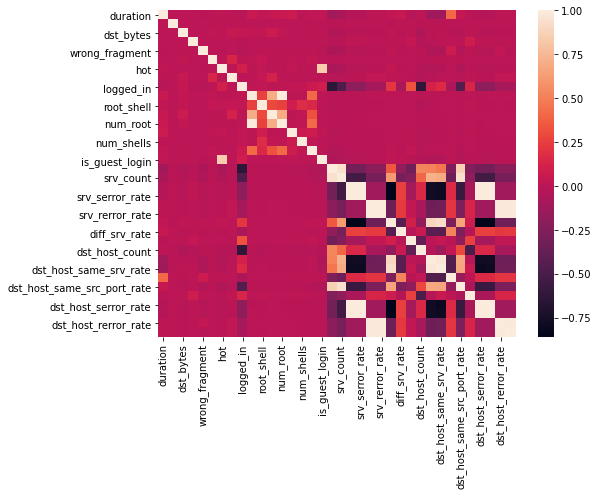

In [ ]:
at = at.dropna('columns')
at = at[[col for col in at if at[col].nunique() > 1]] 
corr = at.corr() 
plt.figure(figsize =(8, 6)) 
sns.heatmap(corr) 
plt.show() 

In [ ]:
at.drop('num_root', axis = 1, inplace = True)
at.drop('srv_serror_rate', axis = 1, inplace = True)
at.drop('srv_rerror_rate', axis = 1, inplace = True)
at.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
at.drop('dst_host_serror_rate', axis = 1, inplace = True) 
at.drop('dst_host_rerror_rate', axis = 1, inplace = True) 
at.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 
at.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 

In [ ]:
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
at['protocol_type'] = at['protocol_type'].map(pmap) 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
at['flag'] =at['flag'].map(fmap)
at.drop('service', axis = 1, inplace = True)

**Modelling**

In [ ]:
len(at.columns)

32

In [ ]:
at = at.drop(['target', ], axis = 1) 
Y = at.iloc[:,30:]
X = at.iloc[:,0:30]
print(X.shape,Y.shape) 

(494021, 30) (494021, 1)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(330994, 30) (163027, 30) (330994, 1) (163027, 1)


In [ ]:
model = MinMaxScaler()
X=model.fit_transform(X)

**MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements
mlp=MLPClassifier(hidden_layer_sizes=(5,2), alpha=1e-5,activation = 'relu',solver='lbfgs',random_state=1)
mlp.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
start = time.time() 
mlp.fit(X_train, Y_train.values.ravel()) 
end= time.time() 
print("Training time: ", end-start) 

Training time:  4.528377532958984


In [ ]:
start= time.time() 
Y_pred = mlp.predict(X_test) 
end = time.time() 
print("Testing time: ", end-start)
cm = confusion_matrix(Y_pred, Y_test)  

Testing time:  0.12661194801330566


In [ ]:
print(accuracy(cm))

0.8050445631705178


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
  
rf = RandomForestClassifier(n_estimators = 50) 
start = time.time() 
rf.fit(X_train, Y_train.values.ravel()) 
end = time.time() 
print("Training time: ", end-start)   


Training time:  10.53995656967163


In [ ]:
start= time.time() 
Y_pred = rf.predict(X_test) 
end = time.time() 
print("Testing time: ", end-start) 

Testing time:  0.8401989936828613


In [ ]:
print("Train score is:", rf.score(X_train, Y_train)) 
print("Test score is:", rf.score(X_test, Y_test)) 

Train score is: 1.0
Test score is: 0.9997669097756813


**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
start = time.time() 
nb.fit(X_train, Y_train.values.ravel()) 
end = time.time() 
print("Training time: ", end-start)

Training time:  0.6406667232513428


In [ ]:
start= time.time() 
Y_pred = nb.predict(X_test) 
end = time.time() 
print("Testing time: ", end-start) 

Testing time:  0.16089129447937012


In [ ]:
print("Train score is:", nb.score(X_train, Y_train)) 
print("Test score is:", nb.score(X_test, Y_test)) 

Train score is: 0.8060418013619582
Test score is: 0.8072098486753728


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start = time.time() 
dt.fit(X_train, Y_train.values.ravel()) 
end = time.time() 
print("Training time: ", end-start)

Training time:  1.004072904586792


In [ ]:
start= time.time() 
Y_pred = dt.predict(X_test) 
end = time.time() 
print("Testing time: ", end-start)

Testing time:  0.03818964958190918


In [ ]:
print("Train score :", dt.score(X_train, Y_train)) 
print("Test score :", dt.score(X_test, Y_test))

Train score : 0.9938548735022387
Test score : 0.9939028504480852


**K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [ ]:
start = time.time() 
kmeans.fit(X_train)
end = time.time() 
print("Training time: ", end-start)

Training time:  2.1383438110351562


In [ ]:
start= time.time() 
train_cluster = kmeans.predict(X_train)
test_cluster = kmeans.predict(X_test) 
end = time.time() 
print("Testing time: ", end-start)

Testing time:  0.184586763381958


In [ ]:
cm = confusion_matrix(Y_pred, Y_test)
print(accuracy(cm))

0.9939028504480852


**SVM**

In [ ]:
from sklearn.svm import SVC  
sv = SVC(gamma='scale')
start = time.time() 
sv.fit(X_train, Y_train.values.ravel()) 
end = time.time() 
print("Training time: ", end-start)

Training time:  2403.339481115341


In [ ]:
start= time.time() 
Y_pred = sv.predict(X_test) 
end = time.time() 
print("Testing time: ", end-start)

Testing time:  761.3405742645264


In [ ]:
print("Train score :", sv.score(X_train, Y_train)) 
print("Test score :", sv.score(X_test, Y_test))

Train score : 0.946926530390279
Test score : 0.9481374250890957


**Gradient Descent**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
gd = GradientBoostingClassifier(random_state = 0)
start= time.time() 
gd.fit(X_train, Y_train.values.ravel()) 
end = time.time() 
print("Training time: ", end-start)

Training time:  261.9018745422363


In [ ]:
start= time.time() 
Y_pred =gd.predict(X_test) 
end = time.time() 
print("Testing time: ", end-start)

Testing time:  1.3920230865478516


In [ ]:
print("Train score is:",gd.score(X_train, Y_train)) 
print("Test score is:", gd.score(X_test, Y_test))

Train score is: 0.999359505006133
Test score is: 0.9991596484017985


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression(max_iter = 1500000)
start= time.time() 
lr.fit(X_train, Y_train.values.ravel()) 
end = time.time() 
print("Training time: ", end-start)

Training time:  3456.5491483211517


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
start= time.time() 
Y_pred = lr.predict(X_test) 
end = time.time() 
print("Testing time: ", end-start)

Testing time:  0.09039545059204102


In [ ]:
print("Train score is:", lr.score(X_train, Y_train)) 
print("Test score is:", lr.score(X_test, Y_test))

Train score is: 0.985035982525363
Test score is: 0.9854073251669969


**Plots**

Accuracy

Testing Accuracy

<BarContainer object of 6 artists>

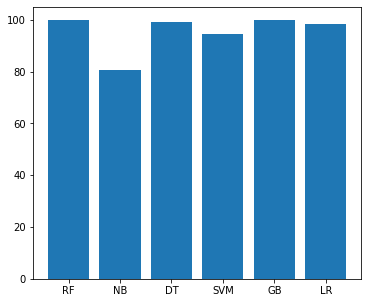

In [19]:
names = ['RF', 'NB', 'DT', 'SVM', 'GB', 'LR'] 
values = [100, 80.604, 99.385, 94.692, 99.935, 98.503] 
f = plt.figure(figsize =(20, 5), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

Training Accuracy

<BarContainer object of 8 artists>

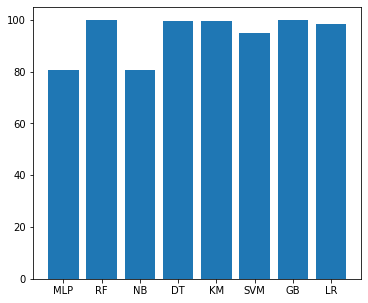

In [20]:
names =  ['MLP', 'RF', 'NB', 'DT', 'KM', 'SVM', 'GB', 'LR']
values = [80.504, 99.976, 80.720, 99.390, 99.390, 94.813, 99.915, 98.540] 
f = plt.figure(figsize =(20, 5), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

Time

Training Time

<BarContainer object of 8 artists>

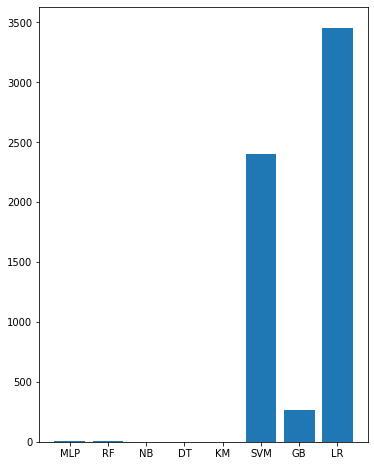

In [21]:
names = ['MLP', 'RF', 'NB', 'DT', 'KM', 'SVM', 'GB', 'LR'] 
values = [4.52837,10.53995 ,0.64066 ,1.00407 , 2.13834, 2403.33948, 261.90187, 3456.54914] 
f = plt.figure(figsize =(20, 8), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

Testing Time

<BarContainer object of 8 artists>

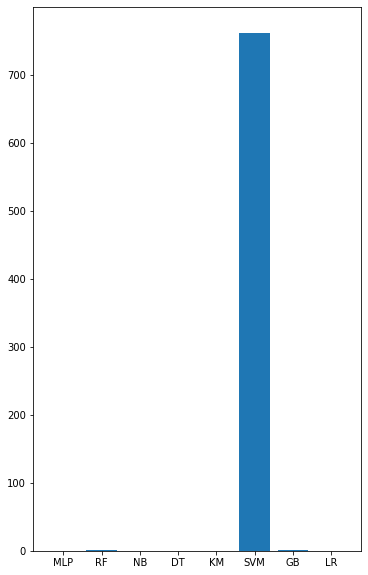

In [22]:
names = ['MLP', 'RF', 'NB', 'DT', 'KM', 'SVM', 'GB', 'LR'] 
values = [0.12661 ,0.84019 ,0.16089 ,0.03818 ,0.18458 ,761.34057 ,1.39202 ,0.09039 ] 
f = plt.figure(figsize =(20, 10), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 